In [1]:
import pandas as pd
import json

df_selected = pd.read_csv("/Users/vatsal/Desktop/SimplyTag/selected_data.csv", low_memory=False)
df_selected

,Timestamp,Trace-id,HTTP Status Code,Path,User Agent
0,2024-11-29T23:00:22.7045112Z,3dff50eaf246e6cc55173db4092d5187,NaN,NaN,NaN
1,2024-11-29T23:00:22.7065968Z,3dff50eaf246e6cc55173db4092d5187,NaN,/api/v2/versions,check_http/v2.4.0 (monitoring-plugins 2.4.0)
2,2024-11-29T23:00:22.7104302Z,3dff50eaf246e6cc55173db4092d5187,NaN,NaN,NaN
3,2024-11-29T23:00:22.7112929Z,3dff50eaf246e6cc55173db4092d5187,NaN,NaN,NaN
4,2024-11-29T23:00:22.7124052Z,3dff50eaf246e6cc55173db4092d5187,NaN,NaN,NaN
...,...,...,...,...,...
2144399,2024-11-19T23:00:03.2857262Z,e633e492116f3febe619bfed47449e89,NaN,NaN,NaN
2144400,2024-11-19T23:00:03.2859194Z,e633e492116f3febe619bfed47449e89,NaN,NaN,NaN
2144401,2024-11-19T23:00:03.2861440Z,e633e492116f3febe619bfed47449e89,NaN,NaN,NaN
2144402,2024-11-19T23:00:03.2863937Z,e633e492116f3febe619bfed47449e89,NaN,NaN,NaN


In [3]:
import matplotlib.pyplot as plt

# Assuming df_selected is the DataFrame containing log data

# Convert 'Timestamp' column to datetime format
df_selected['Timestamp'] = pd.to_datetime(df_selected['Timestamp'])

# Extract hour and day from the timestamp
df_selected['Hour'] = df_selected['Timestamp'].dt.hour
df_selected['Day'] = df_selected['Timestamp'].dt.date
df_selected.columns

Index(['Timestamp', 'Trace-id', 'HTTP Status Code', 'Path', 'User Agent',
       'Hour', 'Day'],
      dtype='object')

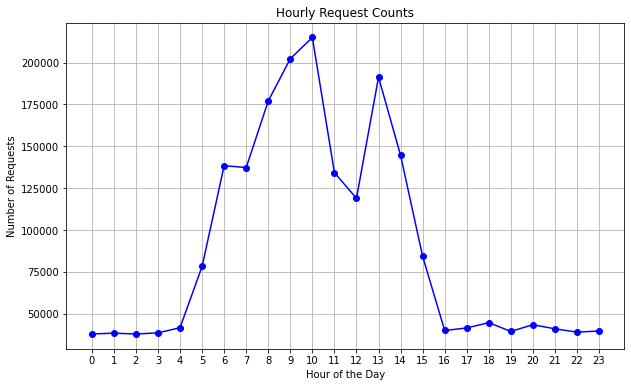

In [4]:
# Group by hour and count requests
hourly_requests = df_selected.groupby('Hour').size().reset_index(name='Request Count')

# Plot hourly requests to identify peak activity
plt.figure(figsize=(10, 6))
plt.plot(hourly_requests['Hour'], hourly_requests['Request Count'], marker='o', color='b')
plt.title('Hourly Request Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.show()


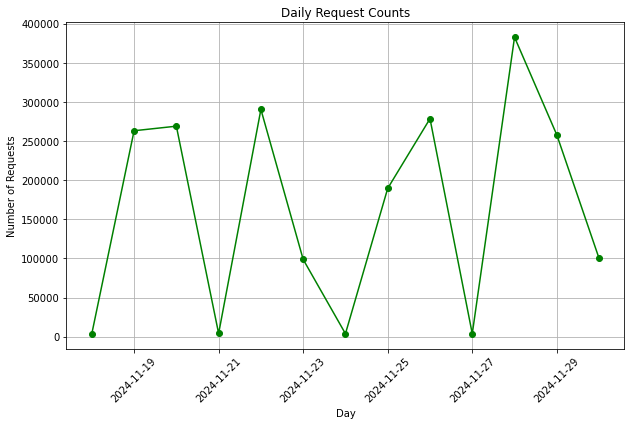

In [5]:
# Group by day and count requests
daily_requests = df_selected.groupby('Day').size().reset_index(name='Request Count')

# Plot daily requests to identify trends over multiple days
plt.figure(figsize=(10, 6))
plt.plot(daily_requests['Day'], daily_requests['Request Count'], marker='o', color='g')
plt.title('Daily Request Counts')
plt.xlabel('Day')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for readability
plt.show()


In [24]:
# Extract hour from 'Timestamp'
df_selected['Hour'] = df_selected['Timestamp'].dt.hour

# Group data by hour
hourly_grouped = df_selected.groupby('Hour')

# Calculate total requests per hour
hourly_request_counts = hourly_grouped.size().reset_index(name='Total Requests')

# Display hourly request counts
print("Hourly Request Counts:\n", hourly_request_counts)


Hourly Request Counts:
     Hour  Total Requests
0      0           37861
1      1           38340
2      2           37861
3      3           38518
4      4           41628
5      5           78224
6      6          138443
7      7          137319
8      8          177113
9      9          202368
10    10          215060
11    11          134263
12    12          118936
13    13          191351
14    14          144564
15    15           84212
16    16           39945
17    17           41453
18    18           44636
19    19           39373
20    20           43414
21    21           40922
22    22           38982
23    23           39618


In [25]:
# Initialize a dictionary to store hourly analysis results
hourly_analysis = {}

# Loop through each hour
for hour, group in hourly_grouped:
    # Analyze paths accessed during the hour
    path_counts = group['Path'].value_counts().reset_index()
    path_counts.columns = ['Path', 'Request Count']
    
    # Analyze HTTP status codes during the hour
    status_code_counts = group['HTTP Status Code'].value_counts().reset_index()
    status_code_counts.columns = ['HTTP Status Code', 'Count']
    
    # Filter for potential breaches (status code 200)
    breaches = group[group['HTTP Status Code'] == 200]['Path'].value_counts().reset_index()
    breaches.columns = ['Path', 'Request Count']
    
    # Store results in the dictionary
    hourly_analysis[hour] = {
        'Total Requests': len(group),
        'Top Paths': path_counts.head(5),
        'Status Codes': status_code_counts,
        'Potential Breaches': breaches.head(5)
    }

# Example: Print analysis for a specific hour (e.g., 14:00)
print("Hourly Analysis for Hour 14:\n", hourly_analysis[14])


Hourly Analysis for Hour 14:
 {'Total Requests': 144564, 'Top Paths':                                                 Path  Request Count
0                                   /api/v2/versions           3216
1                               /api/v1/capabilities           1629
2                                       /api/healthz           1595
3                                 /api/v1/nodes/root            546
4  /api/v1/oems/69bf8dd4-c21e-45ee-bb8c-a6a2d907989b            425, 'Status Codes':    HTTP Status Code  Count
0             200.0  16965
1             204.0   4099
2             404.0    937
3             201.0    282
4             401.0     82
5               0.0     52
6             500.0     40
7             400.0     10
8             415.0      2
9             503.0      2, 'Potential Breaches':                                                 Path  Request Count
0                                   /api/v2/versions           1608
1                               /api/v1/capabilit

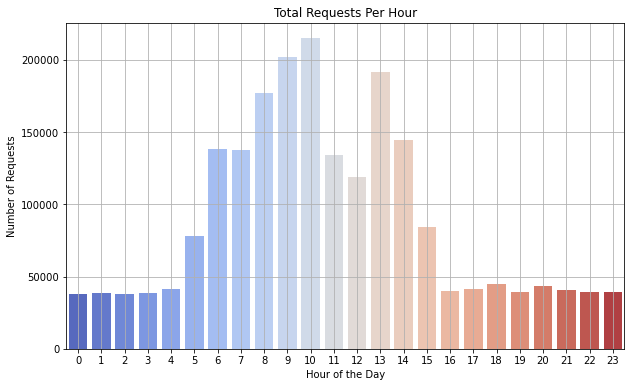

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot hourly request counts
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Total Requests', data=hourly_request_counts, palette='coolwarm')
plt.title('Total Requests Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


In [13]:
from scipy.stats import zscore

# Calculate Z-scores for hourly request counts
hourly_requests['Z-Score'] = zscore(hourly_requests['Request Count'])

# Identify hours with high Z-scores (e.g., > 2 standard deviations)
anomalies = hourly_requests[hourly_requests['Z-Score'] > 2]
print("Anomalous Time Periods:\n", anomalies)


Anomalous Time Periods:
     Hour  Request Count   Z-Score
10    10         215060  2.064935


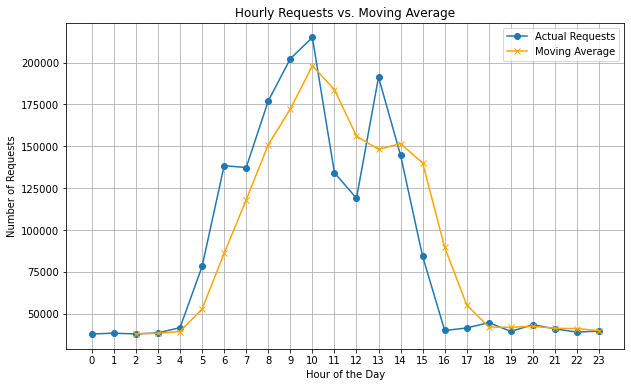

In [14]:
# Calculate a rolling average of request counts (e.g., 3-hour window)
hourly_requests['Moving Average'] = hourly_requests['Request Count'].rolling(window=3).mean()

# Plot moving averages vs. actual request counts
plt.figure(figsize=(10, 6))
plt.plot(hourly_requests['Hour'], hourly_requests['Request Count'], marker='o', label='Actual Requests')
plt.plot(hourly_requests['Hour'], hourly_requests['Moving Average'], marker='x', label='Moving Average', color='orange')
plt.title('Hourly Requests vs. Moving Average')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


# The following analysis is for the Peak time.

In [17]:
# Assuming `hourly_requests` contains the identified peak times
# Extract hours with anomalous Z-scores (or high activity hours)
peak_hours = anomalies['Hour'].tolist()

# Filter the main DataFrame for rows matching these hours
df_peak_activity = df_selected[df_selected['Timestamp'].dt.hour.isin(peak_hours)]
print(f"Rows during peak hours: {len(df_peak_activity)}")
df_peak_activity['Path'].nunique()

Rows during peak hours: 215060


2500

Top 10 Paths during Peak Activity:
                                                 Path  Request Count
0                                   /api/v2/versions           3194
1                               /api/v1/capabilities           2034
2                                       /api/healthz           1578
3                                 /api/v1/nodes/root            779
4                                  /api/v2/documents            707
5  /api/v1/oems/69bf8dd4-c21e-45ee-bb8c-a6a2d907989b            642
6                                 /api/v1/identities            621
7  /api/v2/assets/08db6823-6a30-4aba-81f5-3c664b7...            303
8  /api/v2/nodes/08db6823-6a30-4aba-81f5-3c664b74...            295
9  /api/v2/assets/e28a4256-a101-4d28-b804-0bc09ce...            241


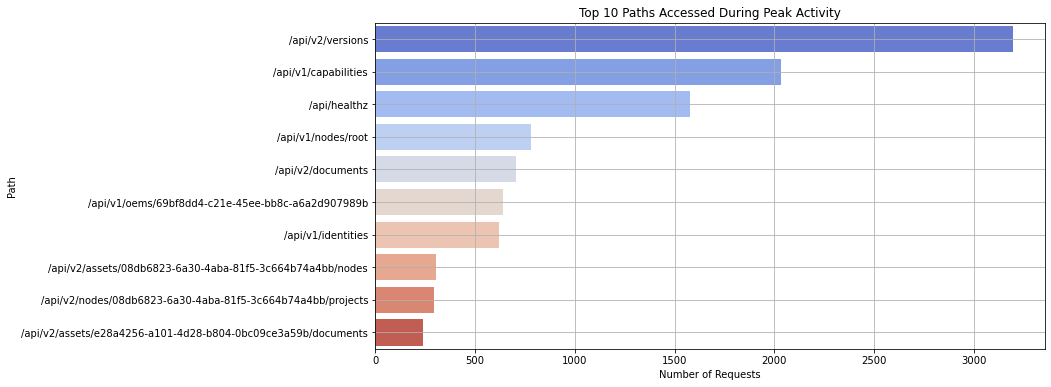

In [20]:
# Analyze the most frequently accessed paths during peak times
path_counts = df_peak_activity['Path'].value_counts().reset_index()
path_counts.columns = ['Path', 'Request Count']

# Display top 10 suspicious paths
print("Top 10 Paths during Peak Activity:\n", path_counts.head(10))

# Plot the top paths
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Request Count', y='Path', data=path_counts.head(10), palette='coolwarm')
plt.title('Top 10 Paths Accessed During Peak Activity')
plt.xlabel('Number of Requests')
plt.ylabel('Path')
plt.grid(True)
plt.show()


HTTP Status Code Distribution during Peak Activity:
     HTTP Status Code  Count
0              200.0  24271
1              204.0   6323
2              201.0   1344
3              404.0    552
4              401.0    112
5              415.0     10
6              400.0      8
7              409.0      8
8              202.0      4
9              499.0      2
10             503.0      2


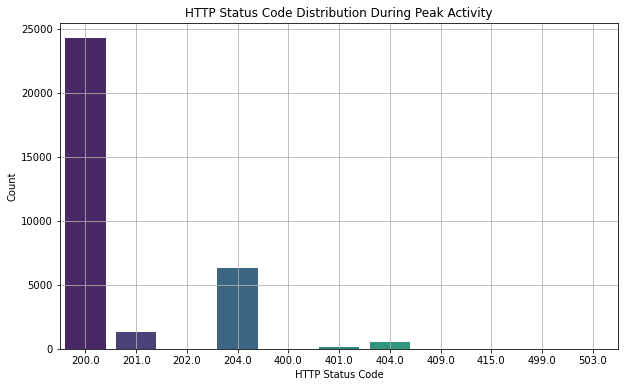

In [21]:
# Analyze the distribution of HTTP status codes during peak times
status_code_counts = df_peak_activity['HTTP Status Code'].value_counts().reset_index()
status_code_counts.columns = ['HTTP Status Code', 'Count']

# Display the distribution
print("HTTP Status Code Distribution during Peak Activity:\n", status_code_counts)

# Plot the status codes
plt.figure(figsize=(10, 6))
sns.barplot(x='HTTP Status Code', y='Count', data=status_code_counts, palette='viridis')
plt.title('HTTP Status Code Distribution During Peak Activity')
plt.xlabel('HTTP Status Code')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Paths Involved in Potential Breaches:
                                                 Path  Request Count
0                                   /api/v2/versions           1597
1                               /api/v1/capabilities            760
2                                 /api/v1/nodes/root            271
3  /api/v1/oems/69bf8dd4-c21e-45ee-bb8c-a6a2d907989b            230
4                                 /api/v1/identities            187
5  /api/v2/assets/08db6823-6a30-4aba-81f5-3c664b7...            108
6  /api/v2/nodes/08db6823-6a30-4aba-81f5-3c664b74...            108
7  /api/v2/assets/e28a4256-a101-4d28-b804-0bc09ce...             89
8  /api/v1/projects/e28a4256-a101-4d28-b804-0bc09...             88
9  /api/v2/projects/e28a4256-a101-4d28-b804-0bc09...             84


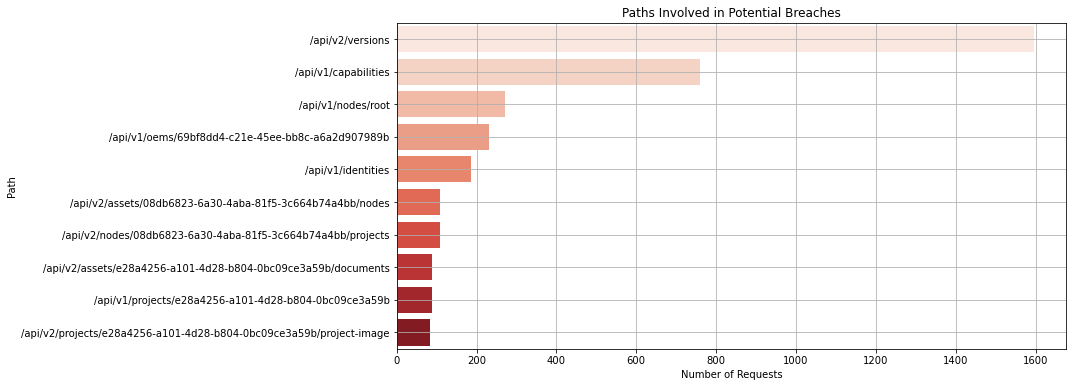

In [22]:
# Filter for potential breaches (status code 200 during suspicious paths)
breaches = df_peak_activity[(df_peak_activity['HTTP Status Code'] == 200)]

# Analyze the paths involved in potential breaches
breach_path_counts = breaches['Path'].value_counts().reset_index()
breach_path_counts.columns = ['Path', 'Request Count']

print("Paths Involved in Potential Breaches:\n", breach_path_counts.head(10))

# Plot the paths with potential breaches
plt.figure(figsize=(12, 6))
sns.barplot(x='Request Count', y='Path', data=breach_path_counts.head(10), palette='Reds')
plt.title('Paths Involved in Potential Breaches')
plt.xlabel('Number of Requests')
plt.ylabel('Path')
plt.grid(True)
plt.show()
